# Import data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler 
from numpy.fft import fft, fftfreq
from scipy import signal

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

In [ ]:
path = "/content/gdrive/MyDrive/Universidade/ADAR - Projeto 1/Data/recovered_signals.csv"
data = pd.read_csv(path, sep=',')

time = data["times"]
sleepstage = data["sleepstage"]
sleepstage_parsed = data["sleepstage_parsed"]

data = data.drop(columns=['times', 'sleepstage', 'sleepstage_parsed'])
n_columns = data.shape[1]
columns_names = list(data.columns.values)
data.head()

,Fp2-F4,F4-C4,C4-P4,P4-O2,F8-T4,T4-T6,FP1-F3,F3-C3,C3-P3,P3-O1,F7-T3,T3-T5,C4-A1
0,1.765923,3.033431,1.671041,1.742022,2.186993,1.636787,1.757793,1.957334,1.541206,1.751639,2.068231,1.861874,1.787452
1,1.775819,3.035960,1.622540,1.691356,2.175336,1.580588,1.765756,1.971296,1.486722,1.697859,2.054249,1.799373,1.742335
2,1.785471,3.048959,1.598497,1.659312,2.176460,1.548903,1.774549,2.002015,1.459595,1.664415,2.052335,1.765201,1.712805
3,1.822959,3.068037,1.620809,1.680810,2.202758,1.585917,1.814903,2.021431,1.482419,1.687036,2.078775,1.801905,1.727316
4,1.822189,3.084682,1.712725,1.765590,2.251003,1.685459,1.815309,2.044149,1.583402,1.776044,2.104994,1.907398,1.802721


# Design IIR Filters

In [ ]:
fs = 128.0 #1/(time.iloc[1]-time.iloc[0])
bandpass = [0.5, 35]

## Butterworth filter

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()


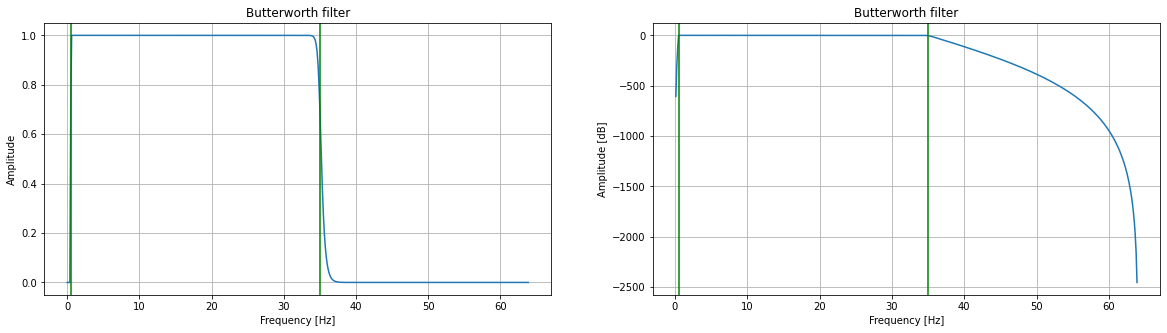

In [ ]:
N = 50 # order of the filter
sos_butter = signal.butter(N, bandpass, btype='bandpass', output='sos', fs=fs)
f, h = signal.sosfreqz(sos_butter, fs=fs)

# PLOT
fig, ax = plt.subplots(1, 2,  figsize=(20, 5))

ax[0].plot(f, abs(h))
ax[0].set_title('Butterworth filter')
ax[0].set_xlabel('Frequency [Hz]')
ax[0].set_ylabel('Amplitude')
ax[0].grid(which='both', axis='both')
ax[0].axvline(0.5, color='green')
ax[0].axvline(35, color='green')

ax[1].plot(f, 20 * np.log10(abs(h)))
ax[1].set_title('Butterworth filter')
ax[1].set_xlabel('Frequency [Hz]')
ax[1].set_ylabel('Amplitude [dB]')
ax[1].grid(which='both', axis='both')
ax[1].axvline(0.5, color='green')
ax[1].axvline(35, color='green')

fig.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log10
  if sys.path[0] == '':


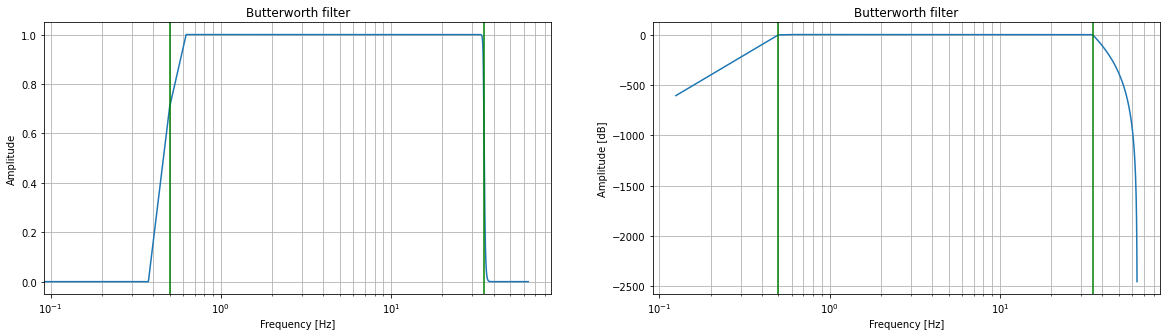

In [ ]:
# PLOT WITH LOG SCALE
fig, ax = plt.subplots(1, 2,  figsize=(20, 5))

ax[0].semilogx(f, abs(h))
ax[0].set_title('Butterworth filter')
ax[0].set_xlabel('Frequency [Hz]')
ax[0].set_ylabel('Amplitude')
ax[0].grid(which='both', axis='both')
ax[0].axvline(0.5, color='green')
ax[0].axvline(35, color='green')

ax[1].semilogx(f, 20 * np.log10(abs(h)))
ax[1].set_title('Butterworth filter')
ax[1].set_xlabel('Frequency [Hz]')
ax[1].set_ylabel('Amplitude [dB]')
ax[1].grid(which='both', axis='both')
ax[1].axvline(0.5, color='green')
ax[1].axvline(35, color='green')

fig.show()

## Chebyshev Type I filter

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log10


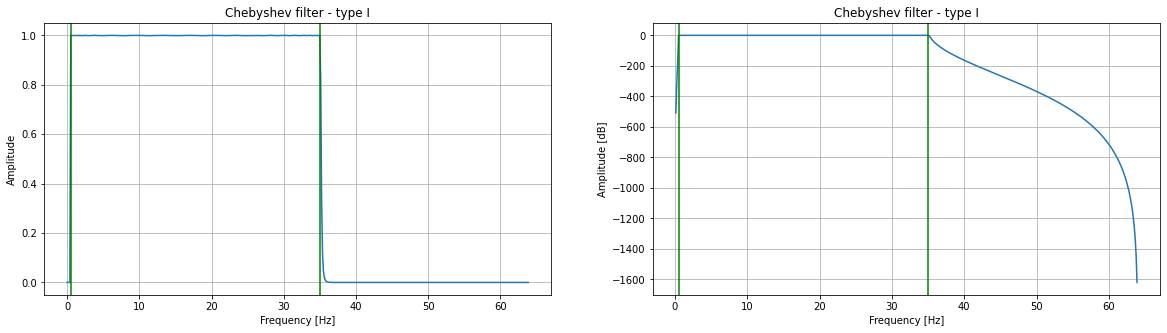

In [ ]:
N = 30 # order of the filter
rp = 0.01 # maximum ripple
sos_cheby1 = signal.cheby1(N, rp, bandpass, 'bandpass', output='sos', fs=fs)
f, h = signal.sosfreqz(sos_cheby1, fs=fs)

# PLOT
fig, ax = plt.subplots(1, 2,  figsize=(20, 5))

ax[0].plot(f, abs(h))
ax[0].set_title('Chebyshev filter - type I')
ax[0].set_xlabel('Frequency [Hz]')
ax[0].set_ylabel('Amplitude')
ax[0].grid(which='both', axis='both')
ax[0].axvline(0.5, color='green')
ax[0].axvline(35, color='green')

ax[1].plot(f, 20 * np.log10(abs(h)))
ax[1].set_title('Chebyshev filter - type I')
ax[1].set_xlabel('Frequency [Hz]')
ax[1].set_ylabel('Amplitude [dB]')
ax[1].grid(which='both', axis='both')
ax[1].axvline(0.5, color='green')
ax[1].axvline(35, color='green')

fig.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log10
  if sys.path[0] == '':


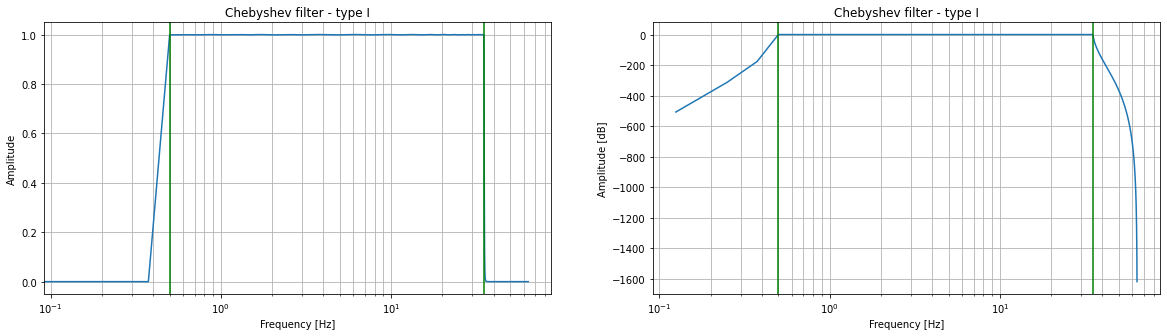

In [ ]:
# PLOT WITH LOG SCALE
fig, ax = plt.subplots(1, 2,  figsize=(20, 5))

ax[0].semilogx(f, abs(h))
ax[0].set_title('Chebyshev filter - type I')
ax[0].set_xlabel('Frequency [Hz]')
ax[0].set_ylabel('Amplitude')
ax[0].grid(which='both', axis='both')
ax[0].axvline(0.5, color='green')
ax[0].axvline(35, color='green')

ax[1].semilogx(f, 20 * np.log10(abs(h)))
ax[1].set_title('Chebyshev filter - type I')
ax[1].set_xlabel('Frequency [Hz]')
ax[1].set_ylabel('Amplitude [dB]')
ax[1].grid(which='both', axis='both')
ax[1].axvline(0.5, color='green')
ax[1].axvline(35, color='green')

fig.show()

## Chebyshev Type II filter

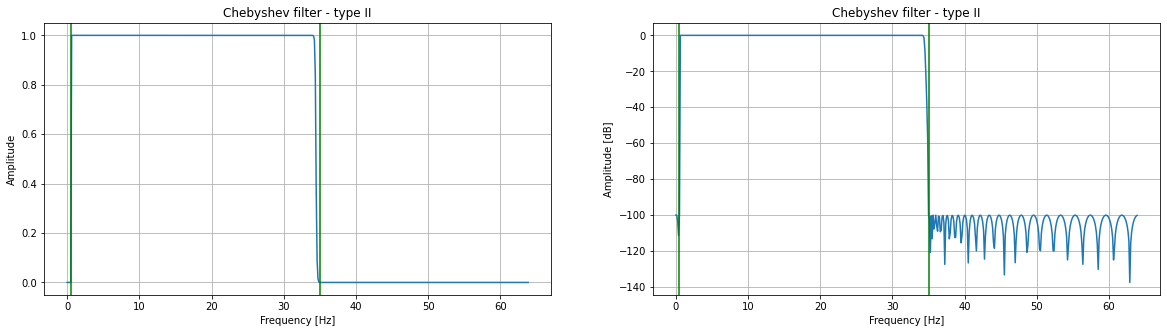

In [ ]:
N = 50 # order of the filter
rs = 100  # minimum attenuation required in the stop band
sos_cheby2 = signal.cheby2(N, rs, bandpass, 'bandpass', output='sos', fs=fs)
f, h = signal.sosfreqz(sos_cheby2, fs=fs)

# PLOT
fig, ax = plt.subplots(1, 2,  figsize=(20, 5))

ax[0].plot(f, abs(h))
ax[0].set_title('Chebyshev filter - type II')
ax[0].set_xlabel('Frequency [Hz]')
ax[0].set_ylabel('Amplitude')
ax[0].grid(which='both', axis='both')
ax[0].axvline(0.5, color='green')
ax[0].axvline(35, color='green')

ax[1].plot(f, 20 * np.log10(abs(h)))
ax[1].set_title('Chebyshev filter - type II')
ax[1].set_xlabel('Frequency [Hz]')
ax[1].set_ylabel('Amplitude [dB]')
ax[1].grid(which='both', axis='both')
ax[1].axvline(0.5, color='green')
ax[1].axvline(35, color='green')

fig.show()

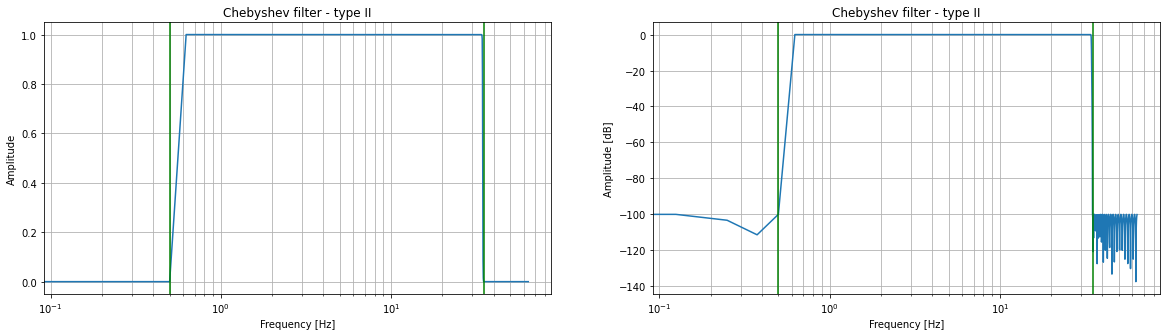

In [ ]:
# PLOT WITH LOG SCALE
fig, ax = plt.subplots(1, 2,  figsize=(20, 5))

ax[0].semilogx(f, abs(h))
ax[0].set_title('Chebyshev filter - type II')
ax[0].set_xlabel('Frequency [Hz]')
ax[0].set_ylabel('Amplitude')
ax[0].grid(which='both', axis='both')
ax[0].axvline(0.5, color='green')
ax[0].axvline(35, color='green')

ax[1].semilogx(f, 20 * np.log10(abs(h)))
ax[1].set_title('Chebyshev filter - type II')
ax[1].set_xlabel('Frequency [Hz]')
ax[1].set_ylabel('Amplitude [dB]')
ax[1].grid(which='both', axis='both')
ax[1].axvline(0.5, color='green')
ax[1].axvline(35, color='green')

fig.show()

# Apply IIR Filters

In [ ]:
signals_butter = signal.sosfilt(sos_butter, data, axis=0)
#signals_cheby1 = signal.sosfilt(sos_cheby1, data, axis=0)
#signals_cheby2 = signal.sosfilt(sos_cheby2, data, axis=0)

## Data Standardization

In [ ]:
signals_butter = MinMaxScaler().fit_transform(signals_butter)
#signals_cheby1 = MinMaxScaler().fit_transform(signals_cheby1)
#signals_cheby2 = MinMaxScaler().fit_transform(signals_cheby2)

## Plot Filtered Data

### All Data

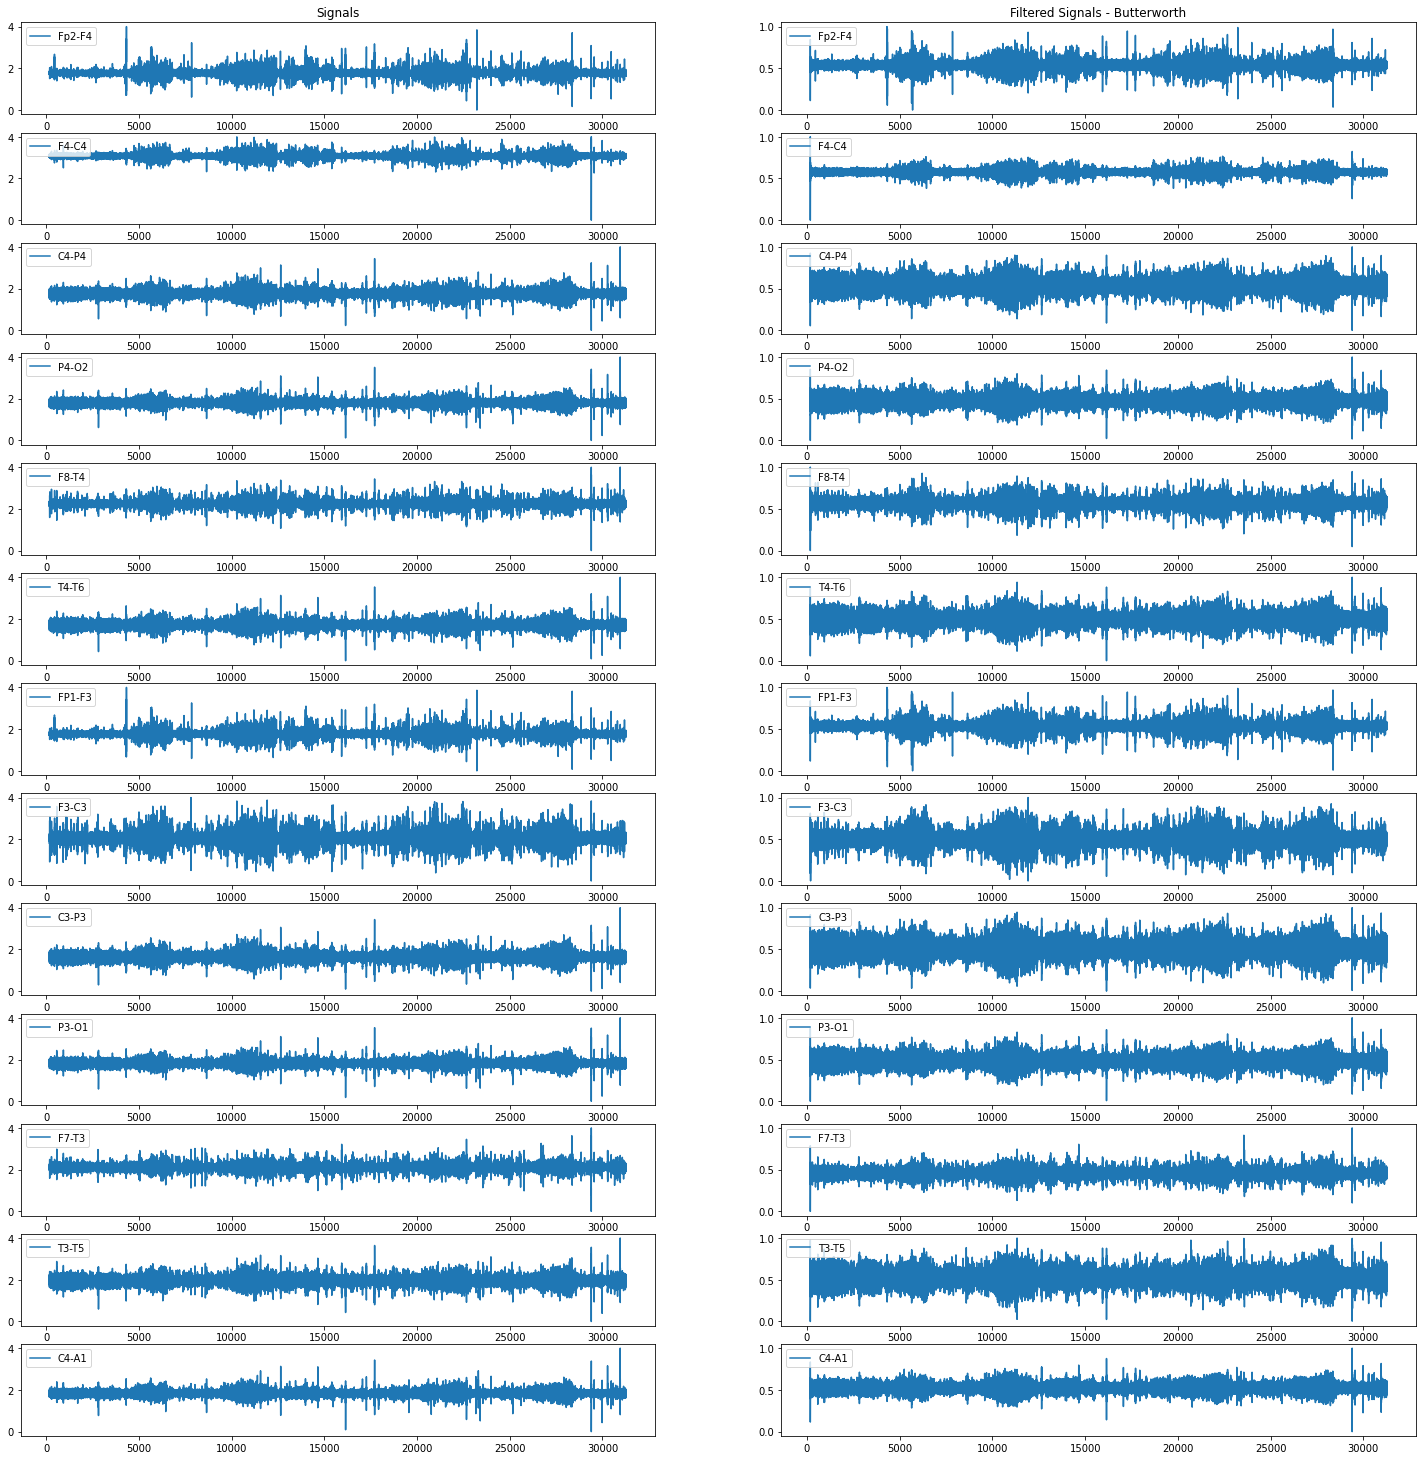

In [ ]:
f, ax = plt.subplots(n_columns, 2, figsize=(25, 2*n_columns))

for j, (signal_type, data_sel, columns) in enumerate([("Signals", data.to_numpy(), columns_names),
                                                      ("Filtered Signals - Butterworth", signals_butter, columns_names)]):
  for i, column_name in enumerate(columns):
    ax[i, j].plot(time, data_sel[:,i], label=column_name)
    ax[i, j].legend(loc='upper left')
  
  ax[0,j].set_title(signal_type)
  

### Smaller portion of the signal


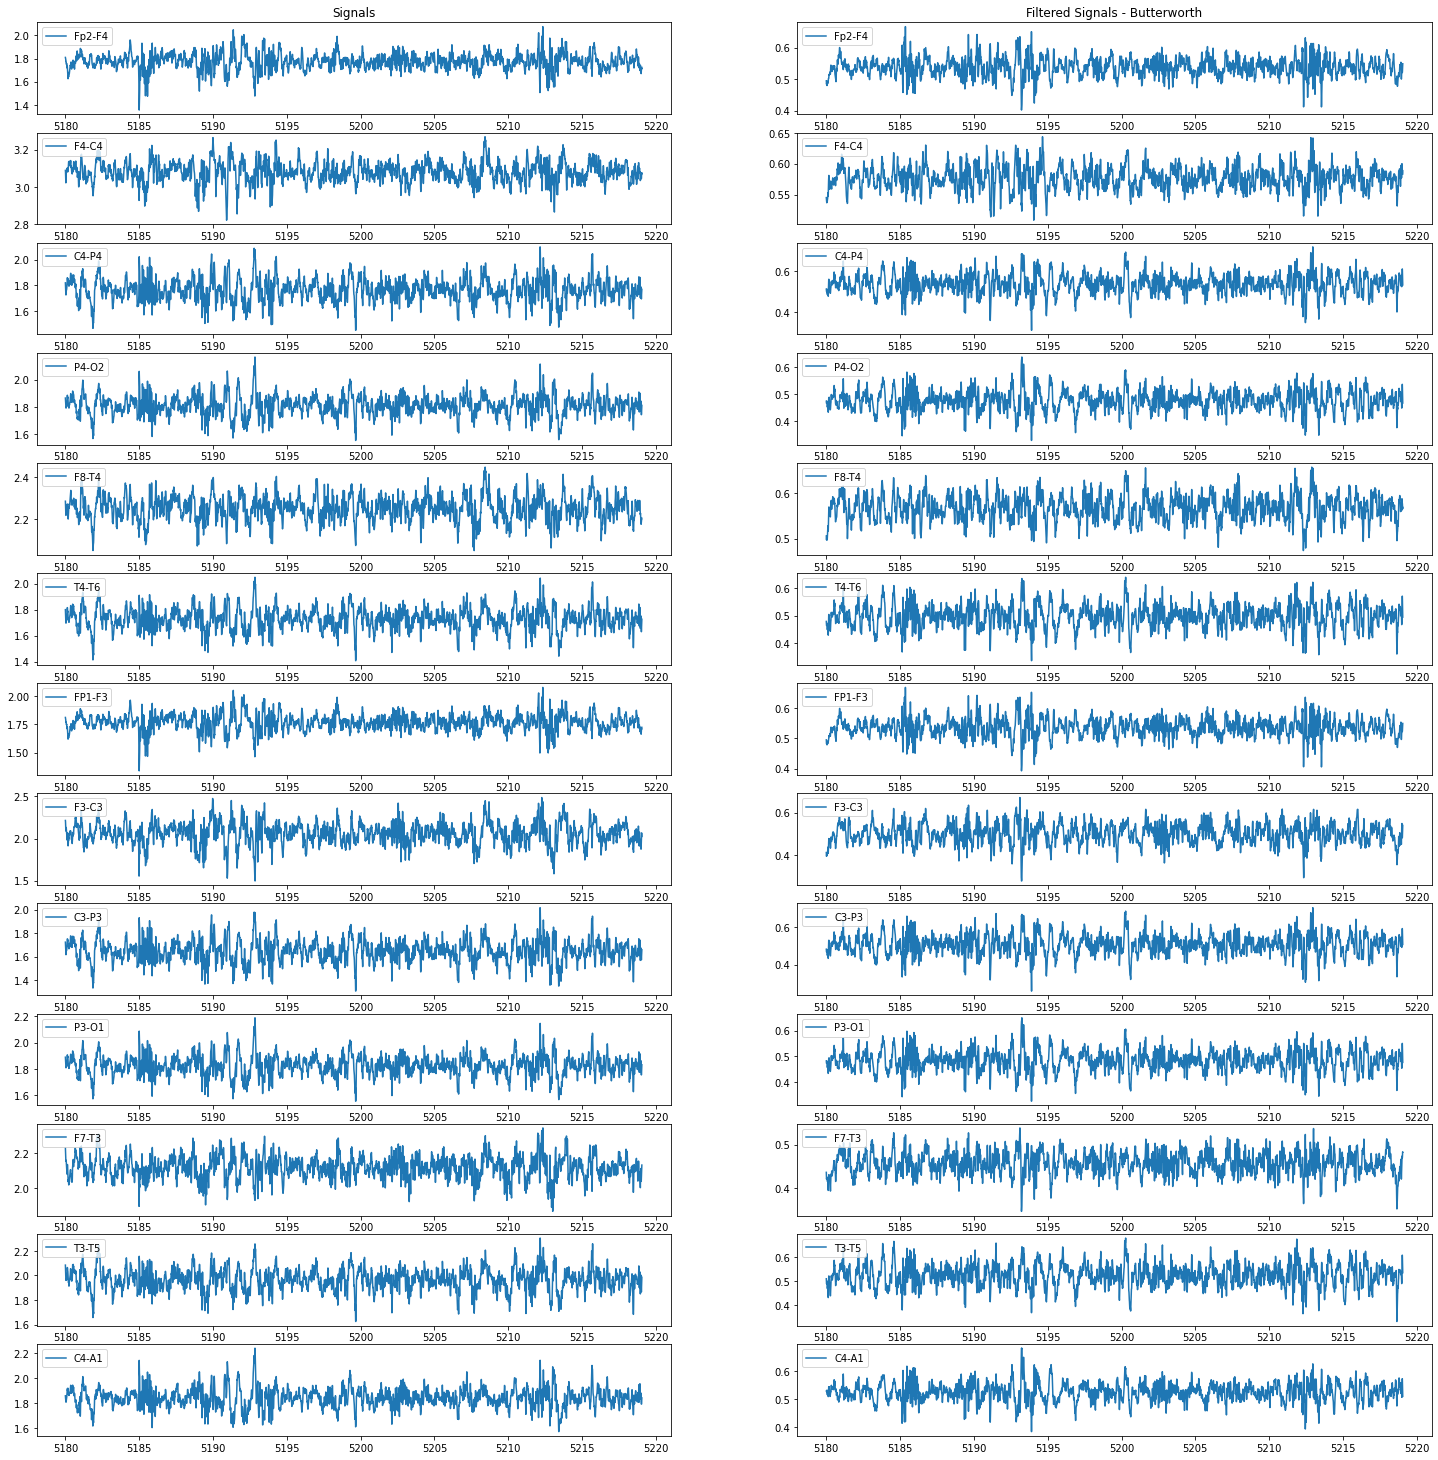

In [ ]:
# 30s ≈ 4000 pontos
dt = time.iloc[1] - time.iloc[0]
ti = int(5000/dt) # 5000 é o ponto visto no gráfico em segundos
tf = ti + 5000 # adicionar mais pontos

f, ax = plt.subplots(n_columns, 2, figsize=(25, 2*n_columns))

for j, (signal_type, data_sel, columns) in enumerate([("Signals", data.to_numpy(), columns_names),
                                                      ("Filtered Signals - Butterworth", signals_butter, columns_names)]):
  for i, column_name in enumerate(columns):
    ax[i, j].plot(time[ti:tf], data_sel[ti:tf,i], label=column_name)
    ax[i, j].legend(loc='upper left')
  
  ax[0,j].set_title(signal_type)

# Save filtered signals

In [ ]:
filtered_data = pd.DataFrame(signals_butter, columns=columns_names) 
filtered_data["times"] = time
filtered_data["sleepstage"] = sleepstage
filtered_data["sleepstage_parsed"] = sleepstage_parsed
filtered_data.head(n=10)

,Fp2-F4,F4-C4,C4-P4,P4-O2,F8-T4,T4-T6,FP1-F3,F3-C3,C3-P3,P3-O1,F7-T3,T3-T5,C4-A1,times,sleepstage,sleepstage_parsed
0,0.538422,0.576926,0.536077,0.476028,0.568046,0.497653,0.537291,0.502172,0.508512,0.483759,0.457779,0.525690,0.524454,180.000000,W,0
1,0.538422,0.576926,0.536077,0.476028,0.568046,0.497653,0.537291,0.502172,0.508512,0.483759,0.457779,0.525690,0.524454,180.007812,W,0
2,0.538422,0.576926,0.536077,0.476028,0.568046,0.497653,0.537291,0.502172,0.508512,0.483759,0.457779,0.525690,0.524454,180.015625,W,0
3,0.538422,0.576927,0.536077,0.476028,0.568046,0.497653,0.537291,0.502172,0.508512,0.483759,0.457779,0.525690,0.524454,180.023438,W,0
4,0.538422,0.576927,0.536078,0.476029,0.568047,0.497653,0.537292,0.502173,0.508513,0.483759,0.457780,0.525690,0.524454,180.031250,W,0
5,0.538426,0.576932,0.536082,0.476033,0.568051,0.497657,0.537295,0.502176,0.508517,0.483764,0.457783,0.525695,0.524458,180.039062,W,0
6,0.538447,0.576961,0.536107,0.476058,0.568080,0.497681,0.537316,0.502197,0.508542,0.483789,0.457807,0.525723,0.524479,180.046875,W,0
7,0.538553,0.577108,0.536237,0.476185,0.568227,0.497800,0.537421,0.502301,0.508671,0.483919,0.457925,0.525865,0.524588,180.054688,W,0
8,0.538999,0.577721,0.536776,0.476717,0.568839,0.498296,0.537862,0.502736,0.509207,0.484461,0.458417,0.526458,0.525042,180.062500,W,0
9,0.540557,0.579867,0.538660,0.478571,0.570979,0.500028,0.539405,0.504260,0.511077,0.486351,0.460139,0.528526,0.526625,180.070312,W,0


In [ ]:
path = "/content/gdrive/MyDrive/Universidade/ADAR - Projeto 1/Data/filtered_data.csv"
filtered_data.to_csv(path, index = False) 